# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [80]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# importing pandas libraries to read and perform actions on the dataset
import pandas as pd

# importing libraries for visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

#reading dataset into dataframe
df_autism = pd.read_csv("Toddler Autism dataset July 2018_cleaned.csv")
# Check if the data is uploaded in dataframe 
df_autism.head()

,Unnamed: 0,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,1,No,No,No,No,No,No,Yes,Yes,No,Yes,28,3,Female,middle eastern,yes,no,family member,No
1,1,2,Yes,Yes,No,No,No,Yes,Yes,No,No,No,36,4,Male,White European,yes,no,family member,Yes
2,2,3,Yes,No,No,No,No,No,Yes,Yes,No,Yes,36,4,Male,middle eastern,yes,no,family member,Yes
3,3,4,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,24,10,Male,Hispanic,no,no,family member,Yes
4,4,5,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,20,9,Female,White European,no,yes,family member,Yes


In [81]:
# deleting the Unnamed column
df_autism.drop(
    labels = ['Unnamed: 0'],axis = 1, inplace = True)
df_autism

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,No,No,No,No,No,No,Yes,Yes,No,Yes,28,3,Female,middle eastern,yes,no,family member,No
1,2,Yes,Yes,No,No,No,Yes,Yes,No,No,No,36,4,Male,White European,yes,no,family member,Yes
2,3,Yes,No,No,No,No,No,Yes,Yes,No,Yes,36,4,Male,middle eastern,yes,no,family member,Yes
3,4,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,24,10,Male,Hispanic,no,no,family member,Yes
4,5,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,20,9,Female,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,No,No,No,No,No,No,No,No,No,Yes,24,1,Female,White European,no,yes,family member,No
1050,1051,No,No,Yes,Yes,Yes,No,Yes,No,Yes,No,12,5,Male,black,yes,no,family member,Yes
1051,1052,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,18,9,Male,middle eastern,yes,no,family member,Yes
1052,1053,Yes,No,No,No,No,No,No,Yes,No,Yes,19,3,Male,White European,no,yes,family member,No


In [82]:
# Replacing the values
df_autism['Jaundice'] = df_autism['Jaundice'].replace({'yes': 1, 'no' : 0})
df_autism['Family_mem_with_ASD'] = df_autism['Family_mem_with_ASD'].replace({'yes': 1, 'no' : 0})
df_autism['Sex'] = df_autism['Sex'].replace({'Male': 1, 'Female' : 0})
df_autism['Class/ASD Traits'] = df_autism['Class/ASD Traits'].replace({'Yes': 1, 'No' : 0})
df_autism


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,No,No,No,No,No,No,Yes,Yes,No,Yes,28,3,0,middle eastern,1,0,family member,0
1,2,Yes,Yes,No,No,No,Yes,Yes,No,No,No,36,4,1,White European,1,0,family member,1
2,3,Yes,No,No,No,No,No,Yes,Yes,No,Yes,36,4,1,middle eastern,1,0,family member,1
3,4,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,24,10,1,Hispanic,0,0,family member,1
4,5,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,20,9,0,White European,0,1,family member,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,No,No,No,No,No,No,No,No,No,Yes,24,1,0,White European,0,1,family member,0
1050,1051,No,No,Yes,Yes,Yes,No,Yes,No,Yes,No,12,5,1,black,1,0,family member,1
1051,1052,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,18,9,1,middle eastern,1,0,family member,1
1052,1053,Yes,No,No,No,No,No,No,Yes,No,Yes,19,3,1,White European,0,1,family member,0


In [83]:
# Shape of the dataset
df_autism.shape

(1054, 19)

In [84]:
#info of the dataset
df_autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   object
 2   A2                      1054 non-null   object
 3   A3                      1054 non-null   object
 4   A4                      1054 non-null   object
 5   A5                      1054 non-null   object
 6   A6                      1054 non-null   object
 7   A7                      1054 non-null   object
 8   A8                      1054 non-null   object
 9   A9                      1054 non-null   object
 10  A10                     1054 non-null   object
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   int64 
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [85]:
#describe of the dataset
df_autism.describe()

,Case_No,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,27.867173,5.212524,0.697343,0.273245,0.161290,0.690702
std,304.407895,7.980354,2.907304,0.459626,0.445837,0.367973,0.462424
min,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,264.250000,23.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,527.500000,30.000000,5.000000,1.000000,0.000000,0.000000,1.000000
75%,790.750000,36.000000,8.000000,1.000000,1.000000,0.000000,1.000000
max,1054.000000,36.000000,10.000000,1.000000,1.000000,1.000000,1.000000


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

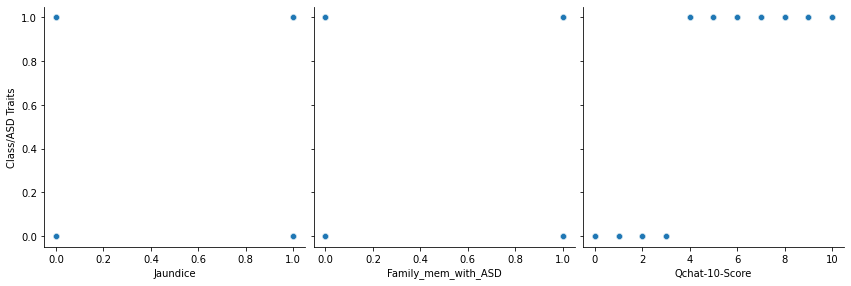

In [86]:
# Importing matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot to visualize the data for correlation
sns.pairplot(df_autism, x_vars=['Jaundice','Family_mem_with_ASD', 'Qchat-10-Score'], 
             y_vars='Class/ASD Traits', size=4, aspect=1, kind='scatter')
plt.show()

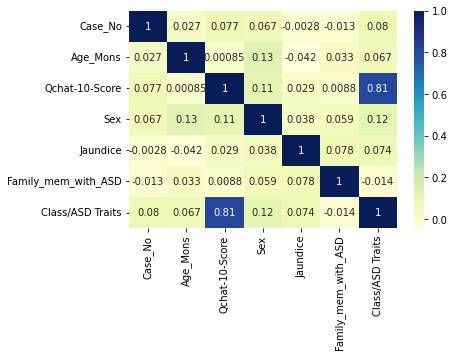

In [87]:
# Visualizing the data using heatmap
sns.heatmap(df_autism.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [88]:
# Step 1 is to assign your x and y
# Creating X and y
X = df_autism['Qchat-10-Score']
y = df_autism['Class/ASD Traits']

In [89]:
# Step 2 is to create your train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [90]:
X_train

1043    10
433      8
160      8
661      1
395      0
        ..
802      6
53      10
350      1
79       3
792      3
Name: Qchat-10-Score, Length: 737, dtype: int64

In [91]:
y_train

1043    1
433     1
160     1
661     0
395     0
       ..
802     1
53      1
350     0
79      0
792     0
Name: Class/ASD Traits, Length: 737, dtype: int64

In [92]:
# Step 3 is to build the model. Remember to import any libraries you may need
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const             0.032254
Qchat-10-Score    0.127809
dtype: float64

In [93]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Class/ASD Traits   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     1357.
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          4.49e-169
Time:                        11:55:05   Log-Likelihood:                -88.936
No. Observations:                 737   AIC:                             181.9
Df Residuals:                     735   BIC:                             191.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0323      0.021      1.565      0.118      -0.008       0.073
Qchat-10-Score     0.1278      0.003     36.831      0.000       0.121       0.135
==============================================================================
Omnibus:                      310.060   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.575
Skew:                           0.217   Prob(JB):                     2.09e-10
Kurtosis:                       1.876   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

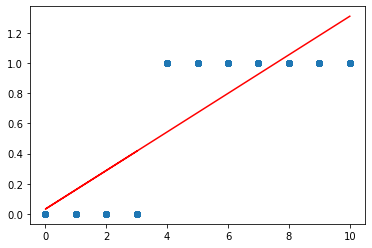

In [95]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train,0.0323 +0.1278*X_train, 'r')
plt.show()


## Error Terms

Finally, plot your error terms!

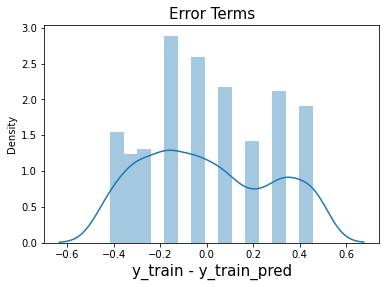

In [97]:
# Step 4 is to perform residual analysis
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value?
   0.649
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? 
   It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? 
   Not really